In [2]:
import pandas as pd

In [3]:
# Import data set
data = pd.read_csv(r"dataset/adult.csv")

General Data Understanding

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# find the mode
workClassMode = data['workclass'].mode()[0]
workClassMode

'Private'

In [6]:
# Replace ? value with mode value
data.replace('?',workClassMode,inplace=True)

In [7]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Private,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
objCols = data.dtypes[data.dtypes == 'object'].index
objCols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [10]:
# Check for ? entries in all features and replace it with corresponding mode value
for col in objCols:
    print(col)     
    mode = data[col].mode()[0]
    data[col].replace('?',mode,inplace = True)

workclass
education
marital-status
occupation
relationship
race
gender
native-country
income


In [11]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Private,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
for col in objCols :
    print(data[data[col] =='?'].shape[0])

0
0
0
0
0
0
0
0
0


In [13]:
# Map income into 0 or 1 label values
data['income'] = data['income'].map({'<=50K':0,'>50K':1})

In [14]:
education_dict = {
        '11th':5, 'HS-grad':4, 'Assoc-acdm':5, 'Some-college':6, '10th':4,
           'Prof-school':5, '7th-8th':3, 'Bachelors':6, 'Masters':7, 'Doctorate':8,
           '5th-6th':3, 'Assoc-voc':4, '9th':4, '12th':5, '1st-4th':2, 'Preschool':1
    }

In [15]:
data['education']=data['education'].map(education_dict)
data


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,5,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,4,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,5,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,6,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,6,10,Never-married,Private,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,5,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,4,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,4,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,4,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Visualizations

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

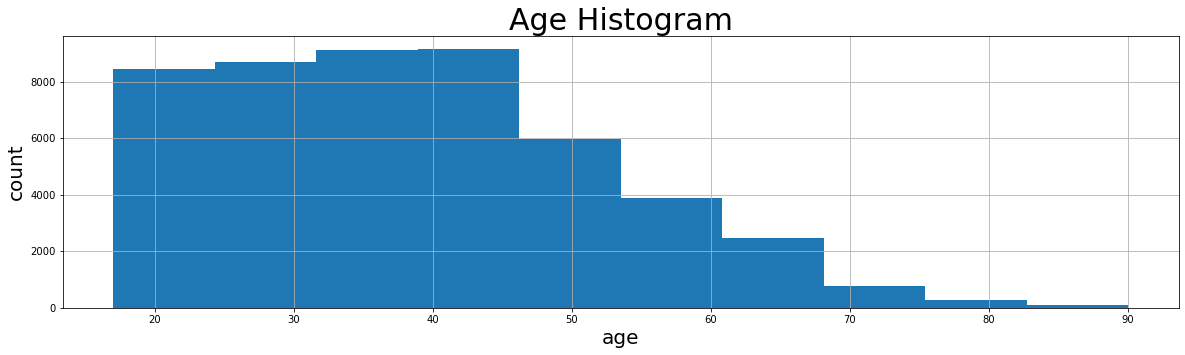

In [22]:
data['age'].hist(figsize = (20,5))
plt.title("Age Histogram",fontsize = 30)
plt.xlabel("age",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.yscale("linear")
plt.show()